<a href="https://colab.research.google.com/github/smilieSushmitha/AV-V/blob/main/AV_V_Regression_tuned_reduced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# python imports

In [27]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn import linear_model, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Mount Drive

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading Data

In [29]:
data = pd.read_csv('/content/drive/MyDrive/AV_V/all_and_classification.csv')  # load data set


data = data.drop('run', axis=1)
data['forks'] = data['forks'].replace(['steady state'], 1)
data['forks'] = data['forks'].replace(['no steady state'], 0)
data = data.loc[data['forks'] == 1]
data = data.drop('forks', axis=1)
data = data.loc[data['steady_state_starts']<= 625]
data


,0,1,2,3,4,5,6,7,8,9,...,2992,2993,2994,2995,2996,2997,2998,2999,steady_state_starts,file_name
1,0.188219,0.075891,0.073269,0.073335,0.073138,0.074449,0.104530,0.079888,0.071762,0.072090,...,0.073138,0.073204,0.073859,0.073204,0.073466,0.073269,0.073400,0.073597,480,eclipse__eclipse-collections#org.eclipse.colle...
2,0.190317,0.075170,0.072417,0.072221,0.073073,0.073531,0.113967,0.096076,0.088605,0.087949,...,0.076218,0.074908,0.074908,0.074842,0.073925,0.075497,0.073925,0.074514,421,eclipse__eclipse-collections#org.eclipse.colle...
4,0.185860,0.074908,0.072155,0.072942,0.072810,0.074252,0.104530,0.095683,0.087753,0.085721,...,0.072745,0.076349,0.072745,0.072614,0.074056,0.072417,0.071959,0.073925,385,eclipse__eclipse-collections#org.eclipse.colle...
6,0.191103,0.077136,0.074187,0.073531,0.072614,0.074121,0.117703,0.094700,0.088146,0.085656,...,0.076808,0.076481,0.073794,0.075366,0.073662,0.074908,0.074187,0.073531,408,eclipse__eclipse-collections#org.eclipse.colle...
7,0.188219,0.074646,0.072876,0.073073,0.073925,0.074252,0.090472,0.094634,0.087359,0.086114,...,0.074187,0.074514,0.075104,0.075104,0.074514,0.075563,0.074711,0.074646,433,eclipse__eclipse-collections#org.eclipse.colle...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5848,0.000042,0.000024,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,...,0.000017,0.000017,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,53,apache__logging-log4j2#org.apache.logging.log4...
5849,0.000045,0.000023,0.000031,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,...,0.000017,0.000017,0.000017,0.000018,0.000017,0.000017,0.000017,0.000017,321,apache__logging-log4j2#org.apache.logging.log4...
5851,0.001629,0.002516,0.002812,0.002784,0.002766,0.002760,0.003237,0.001095,0.001196,0.001301,...,0.001093,0.001142,0.001118,0.001779,0.002299,0.001127,0.001089,0.001095,395,yellowstonegames__SquidLib#squidpony.performan...
5855,0.001660,0.002597,0.002875,0.002770,0.002834,0.002764,0.002709,0.001095,0.001221,0.001445,...,0.001089,0.001090,0.001092,0.001093,0.001092,0.001106,0.001109,0.001106,190,yellowstonegames__SquidLib#squidpony.performan...


#Dividing data (train and test) based on file name 

In [30]:
data_file_name = data['file_name']
data_file_name

# data = data.drop('file_name', axis=1)


1       eclipse__eclipse-collections#org.eclipse.colle...
2       eclipse__eclipse-collections#org.eclipse.colle...
4       eclipse__eclipse-collections#org.eclipse.colle...
6       eclipse__eclipse-collections#org.eclipse.colle...
7       eclipse__eclipse-collections#org.eclipse.colle...
                              ...                        
5848    apache__logging-log4j2#org.apache.logging.log4...
5849    apache__logging-log4j2#org.apache.logging.log4...
5851    yellowstonegames__SquidLib#squidpony.performan...
5855    yellowstonegames__SquidLib#squidpony.performan...
5856    yellowstonegames__SquidLib#squidpony.performan...
Name: file_name, Length: 4234, dtype: object

In [31]:
data_file_name_unique = data_file_name.drop_duplicates(keep="first")

In [32]:
from sklearn.model_selection import train_test_split
data_file_name_train, data_file_name_test = train_test_split(data_file_name_unique, test_size=0.3,
                                                    random_state=1)

In [33]:
data_file_name_train 

5090    r2dbc__r2dbc-h2#io.r2dbc.h2.StagedResultSizeBe...
1250    apache__logging-log4j2#org.apache.logging.log4...
4260    apache__tinkerpop#org.apache.tinkerpop.gremlin...
5790    imglib__imglib2#net.imglib2.loops.SyncedPositi...
3750    hazelcast__hazelcast#com.hazelcast.internal.ut...
                              ...                        
1330    openzipkin__zipkin#zipkin2.internal.ReadBuffer...
1481    eclipse-vertx__vert.x#io.vertx.benchmarks.Json...
730     apache__logging-log4j2#org.apache.logging.log4...
2470    netty__netty#io.netty.handler.codec.mqtt.MqttC...
371     protostuff__protostuff#io.protostuff.benchmark...
Name: file_name, Length: 392, dtype: object

In [34]:
data_file_name_test

3780    yellowstonegames__SquidLib#squidpony.performan...
5429    prestodb__presto#com.facebook.presto.operator....
3660    crate__crate#io.crate.execution.engine.aggrega...
5110    imglib__imglib2#net.imglib2.loops.SyncedPositi...
5001    ReactiveX__RxJava#io.reactivex.rxjava3.core.Fl...
                              ...                        
5310    apache__arrow#org.apache.arrow.vector.Variable...
3900    apache__logging-log4j2#org.apache.logging.log4...
3230    r2dbc__r2dbc-h2#io.r2dbc.h2.StatementBenchmark...
3271    prestodb__presto#com.facebook.presto.geospatia...
181     apache__arrow#org.apache.arrow.adapter.jdbc.Jd...
Name: file_name, Length: 168, dtype: object

In [35]:
train_data = pd.merge(data, data_file_name_train, left_on='file_name', right_on='file_name')
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,2992,2993,2994,2995,2996,2997,2998,2999,steady_state_starts,file_name
0,1.275195e-07,9.926950e-08,6.811809e-08,6.398774e-08,6.178975e-08,5.953370e-08,5.963519e-08,6.025651e-08,5.934733e-08,6.251917e-08,...,6.158755e-08,6.190392e-08,6.259095e-08,6.171464e-08,6.165376e-08,6.169033e-08,6.183229e-08,6.294976e-08,2,JCTools__JCTools#org.jctools.channels.spsc.Sps...
1,1.355830e-07,8.028709e-08,7.046209e-08,6.442911e-08,6.405469e-08,6.284861e-08,6.377896e-08,6.720911e-08,6.983024e-08,6.887329e-08,...,6.338043e-08,6.344368e-08,6.281152e-08,6.257241e-08,6.313669e-08,6.334688e-08,6.329215e-08,6.335572e-08,1,JCTools__JCTools#org.jctools.channels.spsc.Sps...
2,2.332804e-07,7.014395e-08,6.537276e-08,6.246478e-08,6.289740e-08,6.446362e-08,6.377569e-08,6.242375e-08,6.240370e-08,6.766667e-08,...,6.821299e-08,6.777635e-08,6.819488e-08,7.000788e-08,6.753254e-08,6.754947e-08,7.025719e-08,6.747891e-08,1,JCTools__JCTools#org.jctools.channels.spsc.Sps...
3,1.298030e-07,7.878544e-08,7.095477e-08,6.755758e-08,6.438720e-08,6.288830e-08,6.709468e-08,6.686679e-08,6.531514e-08,6.705712e-08,...,6.661401e-08,6.985692e-08,6.698712e-08,6.670719e-08,6.695537e-08,6.678397e-08,6.677750e-08,6.699560e-08,1,JCTools__JCTools#org.jctools.channels.spsc.Sps...
4,6.844240e-05,7.579114e-05,5.004239e-05,4.391429e-05,3.679732e-05,3.567909e-05,2.911061e-05,4.205884e-05,5.189324e-05,5.188036e-05,...,3.142454e-05,3.141652e-05,3.142139e-05,3.255179e-05,3.147647e-05,3.148359e-05,3.159481e-05,3.147299e-05,337,apache__camel#org.apache.camel.converter.Conve...


In [36]:
test_data = pd.merge(data, data_file_name_test, left_on='file_name', right_on='file_name')
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,2992,2993,2994,2995,2996,2997,2998,2999,steady_state_starts,file_name
0,0.188219,0.075891,0.073269,0.073335,0.073138,0.074449,0.104530,0.079888,0.071762,0.072090,...,0.073138,0.073204,0.073859,0.073204,0.073466,0.073269,0.073400,0.073597,480,eclipse__eclipse-collections#org.eclipse.colle...
1,0.190317,0.075170,0.072417,0.072221,0.073073,0.073531,0.113967,0.096076,0.088605,0.087949,...,0.076218,0.074908,0.074908,0.074842,0.073925,0.075497,0.073925,0.074514,421,eclipse__eclipse-collections#org.eclipse.colle...
2,0.185860,0.074908,0.072155,0.072942,0.072810,0.074252,0.104530,0.095683,0.087753,0.085721,...,0.072745,0.076349,0.072745,0.072614,0.074056,0.072417,0.071959,0.073925,385,eclipse__eclipse-collections#org.eclipse.colle...
3,0.191103,0.077136,0.074187,0.073531,0.072614,0.074121,0.117703,0.094700,0.088146,0.085656,...,0.076808,0.076481,0.073794,0.075366,0.073662,0.074908,0.074187,0.073531,408,eclipse__eclipse-collections#org.eclipse.colle...
4,0.188219,0.074646,0.072876,0.073073,0.073925,0.074252,0.090472,0.094634,0.087359,0.086114,...,0.074187,0.074514,0.075104,0.075104,0.074514,0.075563,0.074711,0.074646,433,eclipse__eclipse-collections#org.eclipse.colle...


In [37]:
train_data = train_data.drop('file_name', axis=1)
test_data = test_data.drop('file_name', axis=1)

In [38]:
X_train = train_data.drop('steady_state_starts', axis=1) 
y_train  = train_data['steady_state_starts']
X_test = test_data.drop('steady_state_starts', axis=1)
y_test = test_data['steady_state_starts']

## Standardizing the data

In [39]:
sc = StandardScaler()
sc.fit(X_train.T)
X_train = pd.DataFrame(sc.transform(X_train.T))
X_train = X_train.T

In [40]:
sc = StandardScaler()
sc.fit(X_test.T)
X_test = pd.DataFrame(sc.transform(X_test.T))
X_test = X_test.T

#Displaying data

In [41]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,2.493405,1.438427,0.275097,0.120852,0.038770,-0.045481,-0.041691,-0.018489,-0.052441,0.066009,...,0.093044,0.079742,0.031218,0.043033,0.068690,0.035965,0.033691,0.035057,0.040358,0.082089
1,19.850395,3.919269,1.088619,-0.649525,-0.757397,-1.104877,-0.836836,0.151414,0.906579,0.630874,...,-1.129076,-0.653716,-0.951656,-0.933434,-1.115561,-1.184451,-1.021878,-0.961322,-0.977089,-0.958776
2,7.365034,0.222137,0.013231,-0.114094,-0.095152,-0.026576,-0.056697,-0.115891,-0.116769,0.113669,...,0.113874,0.113235,0.137590,0.118472,0.136797,0.216178,0.107796,0.108538,0.227095,0.105448
3,25.698245,5.467191,2.361931,1.014769,-0.242448,-0.836839,0.831208,0.740838,0.125529,0.816314,...,1.934241,0.912192,0.640598,1.926576,0.788552,0.677549,0.775965,0.707994,0.705428,0.791918
4,6.930946,8.373801,3.318279,2.115085,0.717736,0.498182,-0.791478,1.750784,3.681676,3.679147,...,-0.335963,-0.336712,-0.337158,-0.338733,-0.337777,-0.115834,-0.326962,-0.325566,-0.303728,-0.327647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,5.648390,1.205169,2.998285,2.901957,2.907753,2.900437,2.923936,2.937857,2.897029,3.058809,...,-0.223138,-0.351034,-0.360448,-0.347575,-0.221094,-0.253940,-0.255956,-0.257513,-0.261596,-0.260585
2984,6.128965,1.137952,2.819034,2.755642,2.697177,2.690744,2.728799,2.686920,2.706652,2.759365,...,-0.339418,-0.169677,-0.202522,-0.214544,-0.196766,-0.049341,-0.312705,-0.234998,-0.301529,-0.323573
2985,1.435363,4.310081,5.271857,5.179254,5.121581,5.101479,6.648961,-0.297599,0.030163,0.371756,...,-0.328705,-0.331775,-0.304673,-0.145808,-0.222837,1.920006,3.607995,-0.192926,-0.316728,-0.298249
2986,1.874207,5.394570,6.439192,6.042358,6.282721,6.022390,5.812937,-0.251018,0.221640,1.063728,...,-0.206482,-0.147103,-0.271931,-0.269170,-0.260052,-0.257041,-0.261558,-0.209188,-0.197348,-0.209019


In [42]:
y_train

0         2
1         1
2         1
3         1
4       337
       ... 
2983     53
2984    321
2985    395
2986    190
2987    140
Name: steady_state_starts, Length: 2988, dtype: int64

In [43]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,14.768957,0.099609,-0.242733,-0.234175,-0.259850,-0.088679,3.839693,0.621680,-0.439580,-0.396787,...,-0.217058,-0.157148,-0.259850,-0.251292,-0.165706,-0.251292,-0.217058,-0.242733,-0.225616,-0.199940
1,15.188710,-0.112622,-0.478391,-0.504517,-0.391303,-0.330342,5.042978,2.665480,1.672679,1.585591,...,-0.931248,-1.027044,0.026719,-0.147457,-0.147457,-0.156166,-0.278089,-0.069078,-0.278089,-0.199710
2,16.410016,0.019216,-0.387407,-0.271229,-0.290592,-0.077599,4.395260,3.088255,1.916793,1.616666,...,-1.229699,-1.249062,-0.300274,0.232209,-0.300274,-0.319637,-0.106643,-0.348681,-0.416452,-0.126006
3,16.643856,0.205260,-0.220120,-0.314649,-0.446990,-0.229573,6.056606,2.738638,1.793348,1.434138,...,-0.276838,2.606297,0.157996,0.110731,-0.276838,-0.049968,-0.295743,-0.116138,-0.220120,-0.314649
4,12.432917,-0.392268,-0.592084,-0.569882,-0.473675,-0.436672,1.394969,1.864905,1.043442,0.902831,...,-0.436672,-0.495876,-0.444072,-0.407070,-0.340464,-0.340464,-0.407070,-0.288660,-0.384868,-0.392268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,19.137939,3.263034,1.706507,1.562867,1.498745,1.511159,1.476804,1.534067,1.521579,1.638698,...,-0.127747,-0.126131,-0.084798,-0.104667,-0.111291,-0.114262,-0.115615,-0.116412,0.383745,-0.127419
1242,19.934724,3.509199,2.092171,1.990867,1.926031,2.479410,1.841468,1.809790,1.893525,0.505208,...,-0.105531,-0.100797,-0.093698,-0.108237,-0.106846,-0.103998,-0.106333,-0.105603,-0.105744,-0.105014
1243,19.660820,3.364129,1.706101,1.543446,1.494779,1.478590,1.458402,2.085710,2.197708,1.399425,...,-0.108854,-0.119680,-0.099818,-0.123788,-0.127690,-0.123647,-0.128348,-0.123541,-0.128068,-0.126601
1244,24.398501,4.705596,2.365611,2.217600,2.163380,2.062343,2.010119,1.981302,2.008285,2.152084,...,-0.127656,-0.119580,-0.115194,-0.121251,-0.124015,-0.114678,-0.123691,-0.119007,-0.125609,-0.126870


In [44]:
y_test

0       480
1       421
2       385
3       408
4       433
       ... 
1241     16
1242      8
1243     16
1244      9
1245     47
Name: steady_state_starts, Length: 1246, dtype: int64

In [45]:
# x_data = data.drop('steady_state_starts', axis=1)
# y_data = data['steady_state_starts']

# x_data = data_std.drop(3000, axis=1)
# y_data = data_std[3000]

 # Accurracy measure
 **Mean Absolute Error (MAE)**: MAE measures the average absolute difference between the predicted and actual values. It calculates the average of the absolute differences between each prediction and its corresponding target value. ***Lower MAE values indicate better accuracy***.

**Mean Squared Error (MSE)**: MSE is similar to MAE but squares the differences between predictions and actual values before taking the average. Squaring the errors gives more weight to larger errors. MSE is useful for penalizing outliers more heavily and is widely used. ***Lower MSE values indicate better accuracy***.

**Root Mean Squared Error (RMSE)**: RMSE is the square root of the MSE. It provides an interpretable metric in the same units as the target variable and is easier to relate to the original scale of the problem.

**R-squared (R2)** Score: R2 score measures the proportion of the variance in the target variable that is predictable from the features used in the regression model. It ranges from 0 to 1, with ***1 indicating a perfect fit***. Higher R2 scores indicate better accuracy.

Meaning of negative R2 explained -https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative#:~:text=Here's%20an%20explanation%20for%20those,target%20values%20(%CB%89y).

#  Lasso Regression

In [46]:
from sklearn import linear_model

lassoReg = linear_model.Lasso(alpha=6.0)
lassoReg.fit(X_train, y_train)
y_pred_lasso_reg = lassoReg.predict(X_test)

lasso_mae = mean_absolute_error(y_test, y_pred_lasso_reg)
lasso_mse = mean_squared_error(y_test, y_pred_lasso_reg)
lasso_rmse = mean_squared_error(y_test, y_pred_lasso_reg, squared=False)
lasso_r2 = r2_score(y_test, y_pred_lasso_reg)

print("MAE:", lasso_mae)
print("MSE:", lasso_mse)
print("RMSE:", lasso_rmse)
print("R2 Score:", lasso_r2)

MAE: 114.24248290134321
MSE: 22737.86990081109
RMSE: 150.79081504127197
R2 Score: -0.029067042721875103


# Ridge Regression

In [47]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=8150.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("MAE:", ridge_mae)
print("MSE:", ridge_mse)
print("RMSE:", ridge_rmse)
print("R2 Score:", ridge_r2)

MAE: 115.32447282342191
MSE: 23610.898689159116
RMSE: 153.65838307479066
R2 Score: -0.0685784462682697


#Softmax Regression

In [48]:
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax_reg.fit(X_train, y_train)
y_pred_sofmax = softmax_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
softmax_mae = mean_absolute_error(y_test, y_pred_sofmax)
softmax_mse = mean_squared_error(y_test, y_pred_sofmax)
softmax_rmse = mean_squared_error(y_test, y_pred_sofmax, squared=False)
softmax_r2 = r2_score(y_test, y_pred_sofmax)

print("MAE:", softmax_mae)
print("MSE:", softmax_mse)
print("RMSE:", softmax_rmse)
print("R2 Score:", softmax_r2)

MAE: 102.47030497592296
MSE: 30549.879614767255
RMSE: 174.78523854939024
R2 Score: -0.38262178505808087


# Decision Tree Regression

In [50]:
from sklearn.tree import DecisionTreeRegressor

dtregr = DecisionTreeRegressor(max_depth=5, min_weight_fraction_leaf=0.1)
dtregr.fit(X_train, y_train)
y_pred_dtr = dtregr.predict(X_test)

dt_mae = mean_absolute_error(y_test, y_pred_dtr)
dt_mse = mean_squared_error(y_test, y_pred_dtr)
dt_rmse = mean_squared_error(y_test, y_pred_dtr, squared=False)
dt_r2 = r2_score(y_test, y_pred_dtr)

print("MAE:", dt_mae)
print("MSE:", dt_mse)
print("RMSE:", dt_rmse)
print("R2 Score:", dt_r2)

MAE: 108.00466777578968
MSE: 21488.52754166698
RMSE: 146.58965700780863
R2 Score: 0.027475502929058537


# Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=10)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

rfr_mae = mean_absolute_error(y_test, y_pred_rfr)
rfr_mse = mean_squared_error(y_test, y_pred_rfr)
rfr_rmse = mean_squared_error(y_test, y_pred_rfr, squared=False)
rfr_r2 = r2_score(y_test, y_pred_rfr)

print("MAE:", rfr_mae)
print("MSE:", rfr_mse)
print("RMSE:", rfr_rmse)
print("R2 Score:", rfr_r2)

MAE: 89.28705279593889
MSE: 15537.95621456289
RMSE: 124.65133859916182
R2 Score: 0.29678555109105254


# KNN Model

In [52]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=54, weights='distance')
knr.fit(X_train, y_train)
y_pred_knr = knr.predict(X_test)

knr_mae = mean_absolute_error(y_test, y_pred_knr)
knr_mse = mean_squared_error(y_test, y_pred_knr)
knr_rmse = mean_squared_error(y_test, y_pred_knr, squared=False)
knr_r2 = r2_score(y_test, y_pred_knr)

print("MAE:", knr_mae)
print("MSE:", knr_mse)
print("RMSE:", knr_rmse)
print("R2 Score:", knr_r2)

MAE: 122.74394286388068
MSE: 21626.291905084232
RMSE: 147.058804241991
R2 Score: 0.021240584413265706


# Gausian Regression

In [53]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, alpha=10000, random_state=0)
gpr.fit(X_train, y_train)
y_pred_gpr = gpr.predict(X_test)
gpr.score(X_train, y_train)

gpr_mae = mean_absolute_error(y_test, y_pred_gpr)
gpr_mse = mean_squared_error(y_test, y_pred_gpr)
gpr_rmse = mean_squared_error(y_test, y_pred_gpr, squared=False)
gpr_r2 = r2_score(y_test, y_pred_gpr)

print("MAE:", gpr_mae)
print("MSE:", gpr_mse)
print("RMSE:", gpr_rmse)
print("R2 Score:", gpr_r2)

MAE: 114.86544842948939
MSE: 22959.504773960678
RMSE: 151.52394125668945
R2 Score: -0.03909775995576825


# Neural Network Regression

In [54]:
from sklearn.neural_network import MLPRegressor
#%%
nnRegr = MLPRegressor(random_state=1, max_iter=500, activation='tanh')
nnRegr.fit(X_train, y_train)
y_pred_nnRegr = nnRegr.predict(X_test)

nn_mae = mean_absolute_error(y_test, y_pred_nnRegr)
nn_mse = mean_squared_error(y_test, y_pred_nnRegr)
nn_rmse = mean_squared_error(y_test, y_pred_nnRegr, squared=False)
nn_r2 = r2_score(y_test, y_pred_nnRegr)

print("MAE:", nn_mae)
print("MSE:", nn_mse)
print("RMSE:", nn_rmse)
print("R2 Score:", nn_r2)

MAE: 152.08498073961763
MSE: 43368.90043336669
RMSE: 208.25201183510015
R2 Score: -0.9627830711386081


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


#CNN

In [55]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten

In [56]:
model = Sequential()
model.add(Conv1D(32, 2, activation="softplus", input_shape=(3000, 1)))
model.add(Flatten())
model.add(Dense(64, activation="softplus"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2999, 32)          96        
                                                                 
 flatten (Flatten)           (None, 95968)             0         
                                                                 
 dense (Dense)               (None, 64)                6142016   
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,142,177
Trainable params: 6,142,177
Non-trainable params: 0
_________________________________________________________________


In [57]:
xtrain = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
xtest = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

In [58]:
model.fit(xtrain, y_train, batch_size=12,epochs=20, verbose=0)
y_pred_cnn = model.predict(xtest)


39/39 [==============================] - 2s 54ms/step


In [59]:
cnn_mae = mean_absolute_error(y_test, y_pred_cnn)
cnn_mse = mean_squared_error(y_test, y_pred_cnn)
cnn_rmse = mean_squared_error(y_test, y_pred_cnn, squared=False)
cnn_r2 = r2_score(y_test, y_pred_cnn)

print("MAE:", cnn_mae)
print("MSE:", cnn_mse)
print("RMSE:", cnn_rmse)
print("R2 Score:", cnn_r2)

MAE: 99.10722987801076
MSE: 31269.713943938943
RMSE: 176.83244595927226
R2 Score: -0.4151999371717918


#Results

In [60]:
lst = [
       [lasso_mae, lasso_mse, lasso_rmse, lasso_r2],
       [ridge_mae, ridge_mse, ridge_rmse, ridge_r2],
       [softmax_mae, softmax_mse, softmax_rmse, softmax_r2],
       [dt_mae, dt_mse, dt_rmse, dt_r2],
       [rfr_mae, rfr_mse, rfr_rmse, rfr_r2],
       [knr_mae, knr_mse, knr_rmse, knr_r2],
       [gpr_mae, gpr_mse, gpr_rmse, gpr_r2],
       [nn_mae, nn_mse, nn_rmse, nn_r2],
       [cnn_mae, cnn_mse, cnn_rmse, cnn_r2]]
result = pd.DataFrame(lst, index =[ 'lasso', 'ridge', 'softmax', 'decision_tree', 'random_forest', 'k_nearest_neighbor', 'gausian', 'neural_network', 'cnn'],
                                              columns =['MAE', 'MSE', 'RMSE','R2 Score'])

In [61]:
result

,MAE,MSE,RMSE,R2 Score
lasso,114.242483,22737.869901,150.790815,-0.029067
ridge,115.324473,23610.898689,153.658383,-0.068578
softmax,102.470305,30549.879615,174.785239,-0.382622
decision_tree,108.004668,21488.527542,146.589657,0.027476
random_forest,89.287053,15537.956215,124.651339,0.296786
k_nearest_neighbor,122.743943,21626.291905,147.058804,0.021241
gausian,114.865448,22959.504774,151.523941,-0.039098
neural_network,152.084981,43368.900433,208.252012,-0.962783
cnn,99.107230,31269.713944,176.832446,-0.415200


In [62]:
x_axis = result.index.values.tolist()

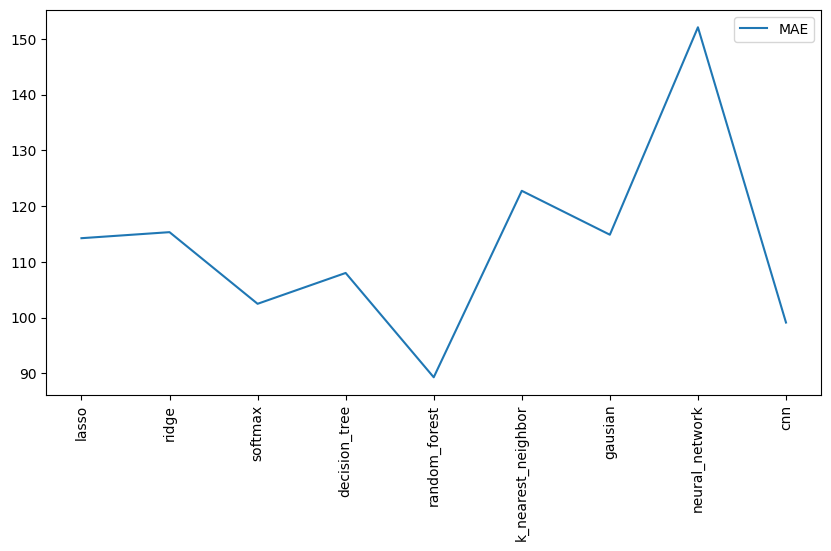

In [63]:
import matplotlib.pyplot as mp
result.plot( y='MAE',
        kind="line", figsize=(10, 5))
mp.xticks(range(9), x_axis, rotation=90)
mp.show()

In [64]:
print(result['MAE'].idxmin())
print(result['MSE'].idxmin())
print(result['RMSE'].idxmin())
print(result['R2 Score'].idxmin())

random_forest
random_forest
random_forest
neural_network
